0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
3096   2023-06-24
3097   2023-06-25
3098   2023-06-26
3099   2023-06-27
3100   2023-06-28
Name: timestamp, Length: 3101, dtype: datetime64[ns]


Text(0.5, 1.0, 'Price Trend')

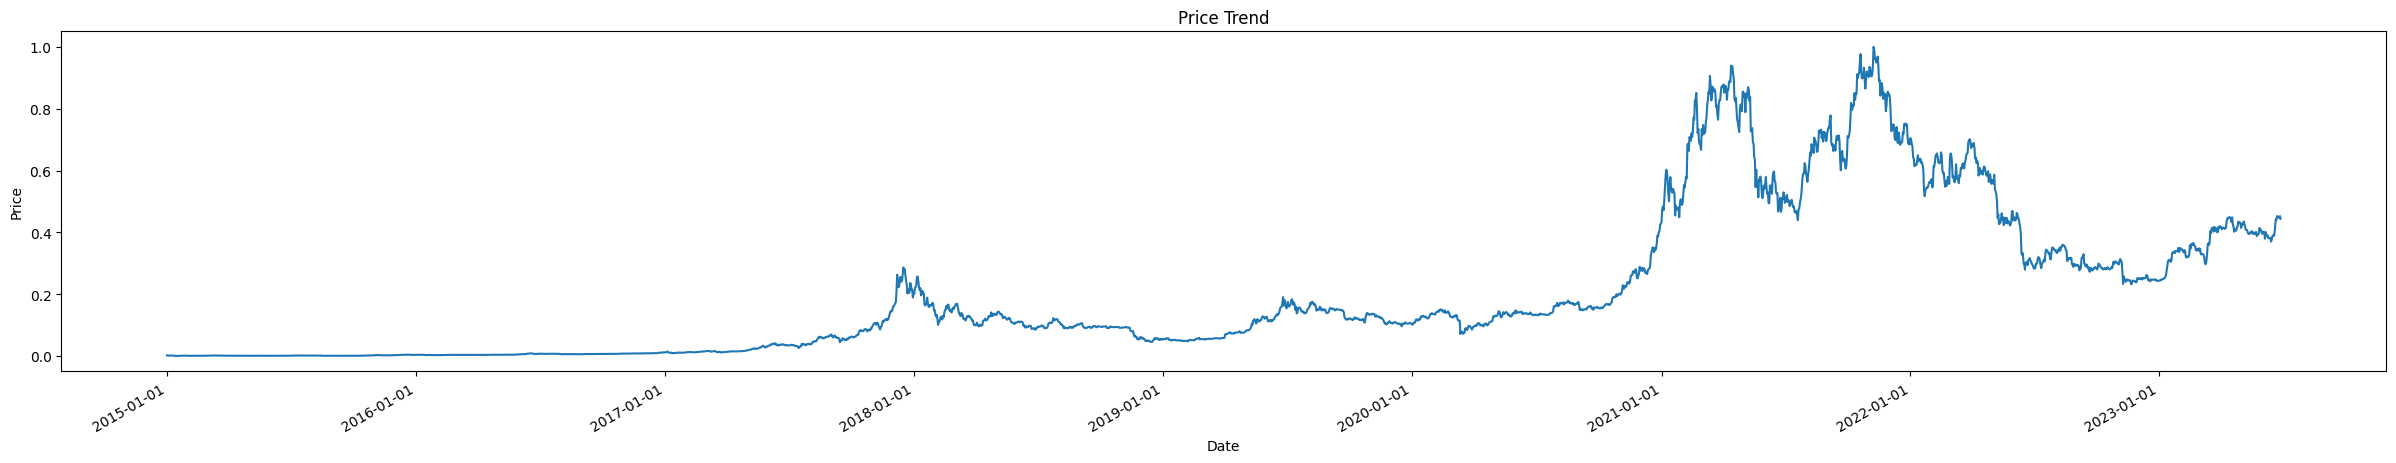

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
data_path = '../bitcoin_scrapy/update/0730/all_filter_update_minimun.csv'
# data_path = './data/infer_result_2021_open.csv'
df = pd.read_csv('data/BTC-USD.csv')
df['timestamp'] = df['Date']
df['value'] = df['Close']


# df = pd.read_csv('data/bitcoin-bitcoin-volatility-index-bvin_daily.csv')

# df = pd.read_csv('data/Price_OHLC.csv')
# df['value'] = df['o']

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.date
df['timestamp'] = pd.to_datetime(df['timestamp'])
scaler = MinMaxScaler()
df[['value']]= scaler.fit_transform(df[['value']])

# start_date = pd.to_datetime('2020-01-01')
# end_date = pd.to_datetime('2023-05-31')
# df = df[(df['timestamp']>= start_date) & (df['timestamp'] <= end_date)]
df = df.sort_values('timestamp', ascending=True)


# filtered_df = df.loc[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

# window_size = 7 # 窗口大小
# df['value'] = df['value'].rolling(window_size).mean()

# df['value'] = df['value'].rolling(window_size).mean()
# df.set_index('timestamp', inplace=True)
# df.index = df.index.shift(window_size, freq='D')
# sentiment = df.reset_index()



print(df['timestamp'])
dates = list(df['timestamp'])
prices = list(df['value'])

# prices
# 绘制价格走势图
plt.figure(figsize=(30, 5))
plt.plot(dates, prices)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trend')

# plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-05-31'))


# 价格走势

                           id      pred  \
0                          20      neut   
1                   314825462       pos   
2                   800429674       pos   
3                   982620972  negative   
4                  1110302988       pos   
...                       ...       ...   
21623975  1685171032347537408       NaN   
21623976  1685171059698638848       NaN   
21623977  1685172457177772032       NaN   
21623978  1685179701638373376      neut   
21623979  1685358895337005056       NaN   

                                                 scores  label  \
0              pos=27.75\nneg=23.296875\nneu=33.65625\n      0   
1            pos=30.78125\nneg=20.1875\nneu=24.421875\n      0   
2         pos=31.921875\nneg=22.171875\nneu=21.328125\n      0   
3           pos=20.671875\nneg=31.6875\nneu=26.078125\n      1   
4         pos=31.953125\nneg=21.828125\nneu=28.265625\n      0   
...                                                 ...    ...   
21623975             

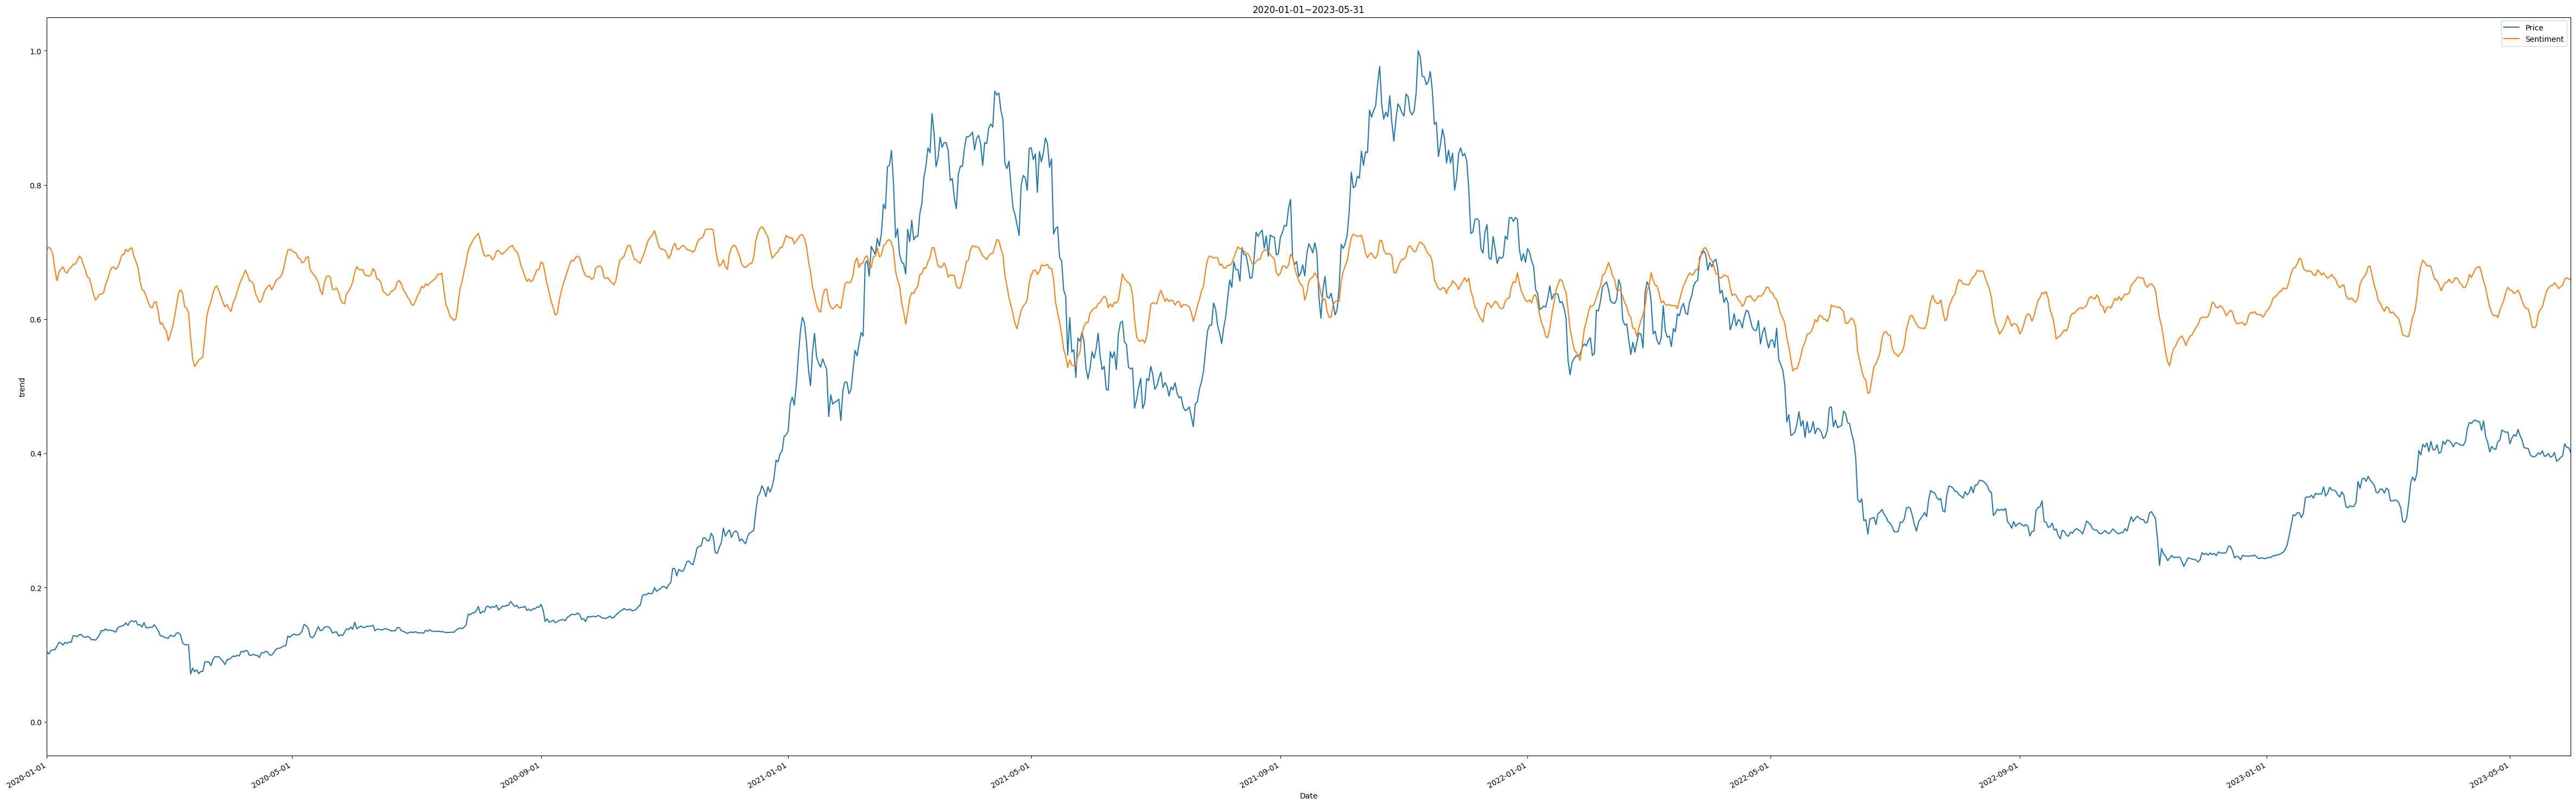

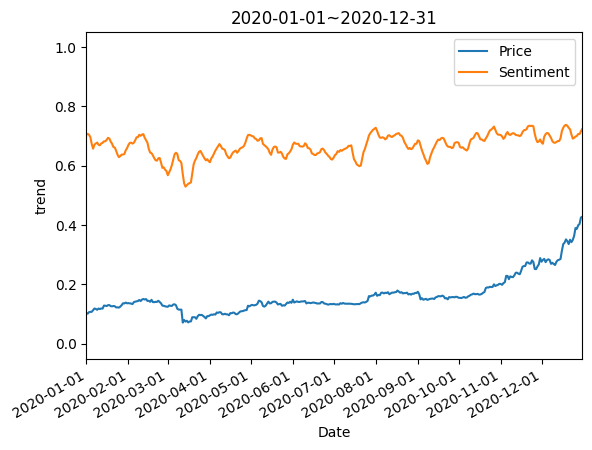

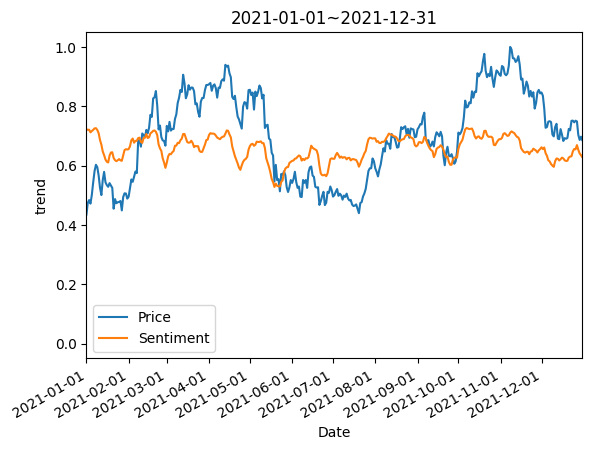

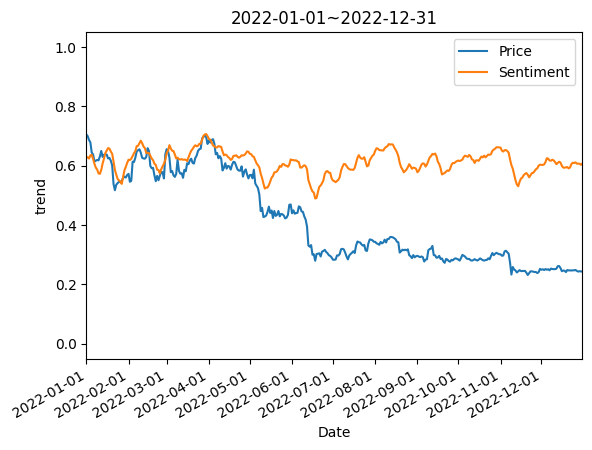

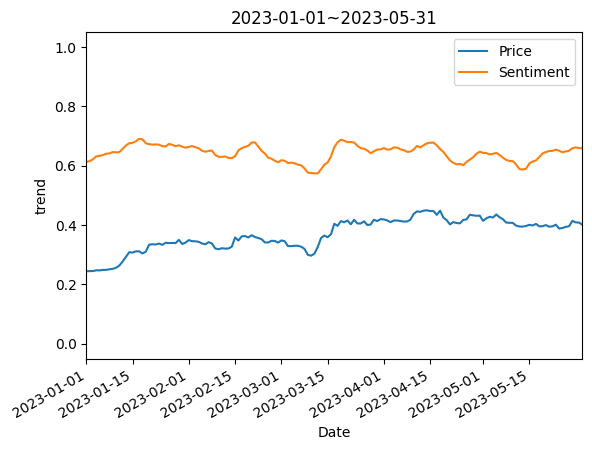

In [8]:
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np
sentiment = pd.read_csv(data_path)
# sentiment = pd.read_csv('data/all_filter.csv',lineterminator='\n')
print(sentiment)
sentiment = sentiment[sentiment['scores'].notnull()]
# filter
print(len(sentiment))
sentiment = sentiment[sentiment['label'] == 1]
print(len(sentiment))

print(len(sentiment))
thr = 100
sentiment = sentiment[(sentiment['user_follower_count'] > thr) | (sentiment['favorite_count'] > thr) | (sentiment['quote_count'] > thr) | (sentiment['reply_count'] > thr) | (sentiment['retweet_count'] > thr)]
print(len(sentiment))

sentiment['date'] = pd.to_datetime(sentiment['day'])
# 将日期列设置为索引
sentiment.set_index('date', inplace=True)
sentiment['scores']  = sentiment['scores'].astype('str')
# sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]) if row[0][4:] else 0)
sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]))
sentiment['neg'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[1][4:]))
sentiment['neu'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[2][4:]))
sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
# print(sentiment)
# print(sentiment.groupby(sentiment.index)['date'])
# 按天求和
sentiment = sentiment.groupby(sentiment.index)['metrics'].mean().reset_index()
# sentiment = sentiment['metrics']
print(sentiment)
# 过滤outlier
# sentiment = sentiment[sentiment['metrics']>10000]
# sentiment = sentiment[sentiment['metrics']<16000]
# 归一化
scaler = MinMaxScaler()
sentiment[['metrics']]= scaler.fit_transform(sentiment[['metrics']])



# test = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
# print(test.columns)
# test[['date','value','metrics']].to_csv('metrics.csv',index=False)





# 滑动窗口平滑
window_size = 7 # 窗口大小
sentiment['metrics'] = sentiment['metrics'].rolling(window_size).mean()
# sentiment['pos'] = sentiment['pos'].iloc[::-1].rolling(window_size).mean()[::-1]
# print(sentiment['pos'])
# 平移
# sentiment.set_index('date', inplace=True)
# sentiment.index = sentiment.index.shift(1, freq='D')
# sentiment = sentiment.reset_index()
# sentiment['date'] = sentiment['date'].shift(7, freq='D')
# 绘制价格走势图
trend = sentiment['metrics'].tolist()
sen_dates = sentiment['date'].tolist()

def show_trend(start, end, flag):
    if flag == 1:
        plt.figure(figsize=(60, 20))
    plt.plot(dates, prices,label='Price')
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gcf().autofmt_xdate()
    # plt.xlabel('Date')
    # plt.ylabel('Price')
    # plt.title('Price Trend')
    # plt.xlim(pd.Timestamp(START), pd.Timestamp(END))


    plt.plot(sen_dates, trend,label='Sentiment')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('trend')
    plt.title(start+'~'+end)
    plt.xlim(pd.Timestamp(start), pd.Timestamp(end))
    plt.legend()
    plt.savefig(start + end + '.pdf', format='pdf', bbox_inches='tight')
    plt.show()

    # global sentiment
    # sentiment = sentiment[sentiment['metrics'].notnull()]
    # join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
    # join = join[(join['date']>= pd.Timestamp(start)) & (join['date'] <= pd.Timestamp(end))]
    # # print(join)
    
    # t1 = join['metrics'].to_list()
    # t2 = join['value'].to_list()
    # good = 0
    # for i in range(1,len(t1),1):
    #     if (t1[i] - t1[i-1])*(t2[i]-t2[i-1]) > 0:
    #         good = good + 1



    # date = join['date'].to_list()
    # corr = np.corrcoef(t1, t2)[0, 1]
    # print(len(date))
    # print("皮尔森相关系数为:", corr, good/len(t1))
show_trend('2020-01-01', '2023-05-31', 1)
show_trend('2020-01-01', '2020-12-31', 0)
show_trend('2021-01-01', '2021-12-31', 0)
show_trend('2022-01-01', '2022-12-31', 0)
show_trend('2023-01-01', '2023-05-31', 0)

# 差分走势

In [ ]:
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np
sentiment = pd.read_csv(data_path)
sentiment = sentiment[sentiment['scores'].notnull()]
# filter
# print(len(sentiment))
# sentiment = sentiment[sentiment['label'] == 1]
# print(len(sentiment))

# print(len(sentiment))
# thr = 100
# sentiment = sentiment[(sentiment['user_follower_count'] > thr) | (sentiment['favorite_count'] > thr) | (sentiment['quote_count'] > thr) | (sentiment['reply_count'] > thr) | (sentiment['retweet_count'] > thr)]
# print(len(sentiment))

sentiment['date'] = pd.to_datetime(sentiment['day'])
# 将日期列设置为索引
sentiment.set_index('date', inplace=True)
sentiment['scores']  = sentiment['scores'].astype('str')
# sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]) if row[0][4:] else 0)
sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]))
sentiment['neg'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[1][4:]))
sentiment['neu'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[2][4:]))
sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
# print(sentiment)
# print(sentiment.groupby(sentiment.index)['date'])
# 按天求和
sentiment = sentiment.groupby(sentiment.index)['metrics'].mean().reset_index()
# sentiment = sentiment['metrics']
# print(sentiment)
# 过滤outlier
# sentiment = sentiment[sentiment['metrics']>10000]
# sentiment = sentiment[sentiment['metrics']<16000]
# 归一化
scaler = MinMaxScaler()
sentiment[['metrics']]= scaler.fit_transform(sentiment[['metrics']])
# 滑动窗口平滑
window_size = 7 # 窗口大小
sentiment['metrics'] = sentiment['metrics'].rolling(window_size).mean()
# diff计算
# print(sentiment['metrics'][0:10])
sentiment['metrics_diff'] = sentiment['metrics'].diff()
# sentiment = sentiment[sentiment['metrics_diff'] < 9999]

# 平移
sentiment.set_index('date', inplace=True)
sentiment.index = sentiment.index.shift(1, freq='D')
sentiment = sentiment.reset_index()
# print(sentiment[sentiment['metrics_return'] > 1])

df['value_diff'] = df['value'].diff()


# print(df[df['value_return'] > 1])
# df['value']
# price_return[0:10]


# 绘制价格走势图
trend = sentiment['metrics_diff'].tolist()
sen_dates = sentiment['date'].tolist()
dates = list(df['timestamp'])
prices = list(df['value_diff'])
print(trend)
print(prices)
def show_trend(start, end, flag):
    if flag == 1:
        plt.figure(figsize=(60, 20))
    plt.plot(dates, prices,label='Price_diff')

    plt.plot(sen_dates, trend,label='Sentiment_diff')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('trend')
    plt.title(start+'~'+end)
    plt.ylim(-0.2,0.2)
    plt.xlim(pd.Timestamp(start), pd.Timestamp(end))
    plt.legend()
    plt.show()

    global sentiment
    sentiment = sentiment[sentiment['metrics_diff'].notnull()]
    join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
    join = join[(join['date']>= pd.Timestamp(start)) & (join['date'] <= pd.Timestamp(end))]
    # print(join)
    
    t1 = join['metrics_diff'].to_list()
    t2 = join['value_diff'].to_list()
    date = join['date'].to_list()
    corr = np.corrcoef(t1, t2)[0, 1]
    good = 0
    for i in range(len(t1)):
        if t1[i] * t2[i] > 0:
            good = good + 1
    print(good/len(t1))
    print(len(date))
    print("皮尔森相关系数为:", corr)
show_trend('2020-01-01', '2023-05-31', 1)
show_trend('2020-01-01', '2020-12-31', 0)
show_trend('2021-01-01', '2021-12-31', 0)
show_trend('2022-01-01', '2022-12-31', 0)
show_trend('2023-01-01', '2023-05-31', 0)

# 使用pos/negative的比例

In [ ]:
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np
sentiment = pd.read_csv(data_path,dtype={'id':str})

print(sentiment[sentiment['created_at'].isna()])

print(sentiment.columns)
print(len(sentiment))
sentiment = sentiment[sentiment['pred'].isin(['pos','negative','neut'])]

# filter
sentiment = sentiment[sentiment['label'] == 1]
print(len(sentiment))

print(len(sentiment))
thr = 100
sentiment = sentiment[(sentiment['user_follower_count'] > thr) | (sentiment['favorite_count'] > thr) | (sentiment['quote_count'] > thr) | (sentiment['reply_count'] > thr) | (sentiment['retweet_count'] > thr)]
print(len(sentiment))

sentiment['date'] = pd.to_datetime(sentiment['day'])
sentiment.set_index('date', inplace=True)


# 按天统计pos和negative的数量
grouped = sentiment.groupby(sentiment.index)

ratios = []
for date, group in grouped:
    counts = group['pred'].value_counts()
    if 'pos' in counts.index and 'negative' in counts.index:
        pos_count = counts['pos']
        neg_count = counts['negative']
        ratio = pos_count / neg_count
        ratios.append((date, ratio))

# 构建DataFrame
sentiment = pd.DataFrame(ratios, columns=['date', 'metrics'])

sentiment['metrics_return'] = sentiment['metrics'].pct_change()
sentiment = sentiment[sentiment['metrics_return'] < 9999]
df['value_return'] = df['value'].pct_change()
df = df[df['value_return'] < 9999]


sentiment.set_index('date', inplace=True)
sentiment.index = sentiment.index.shift(1, freq='D')
sentiment = sentiment.reset_index()


# 绘制价格走势图
trend = sentiment['metrics_return'].tolist()
sen_dates = sentiment['date'].tolist()
dates = list(df['timestamp'])
prices = list(df['value_return'])
print(trend)
print(prices)
def show_trend(start, end, flag):
    if flag == 1:
        plt.figure(figsize=(60, 20))
    plt.plot(dates, prices,label='Price_return')

    plt.plot(sen_dates, trend,label='Sentiment_return')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('trend')
    plt.title(start+'~'+end)
    plt.ylim(-0.2,0.2)
    plt.xlim(pd.Timestamp(start), pd.Timestamp(end))
    plt.legend()
    plt.show()

    global sentiment
    sentiment = sentiment[sentiment['metrics_return'].notnull()]
    join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
    join = join[(join['date']>= pd.Timestamp(start)) & (join['date'] <= pd.Timestamp(end))]
    # print(join)
    
    t1 = join['metrics_return'].to_list()
    t2 = join['value_return'].to_list()
    good = 0
    for i in range(len(t1)):
        if t1[i] * t2[i] > 0:
            good = good + 1
    print(good/len(t1))
    date = join['date'].to_list()
    corr = np.corrcoef(t1, t2)[0, 1]
    print(len(date))
    print("皮尔森相关系数为:", corr)
show_trend('2020-01-01', '2023-05-31', 1)


# return走势

Index(['id', 'pred', 'scores', 'label', 'user_follower_count',
       'favorite_count', 'quote_count', 'reply_count', 'retweet_count', 'day',
       'created_at'],
      dtype='object')
21623980
13795617
13795617
9286767
0       0.081666
1       0.898734
2       0.072274
3       0.959575
4       0.008983
          ...   
1778    0.717290
1779    0.648658
1780    0.673404
1781    0.831053
1782    0.602918
Name: metrics, Length: 1783, dtype: float64
[10.004999999999999, -0.9195820081781009, 12.276836158192086, -0.9906382978723404, 100.43181818181785, -0.9493614160878333, -0.08849557522123885, -0.3980582524271844, 35.56451612903223, -0.9466254962505514, 0.47107438016529035, -0.5842696629213486, 1.0472972972972974, -0.26732673267326734, 0.6036036036036048, 0.08988764044943798, -0.7525773195876289, -0.6041666666666652, 116.13157894736788, 0.0029206919793305364, -0.9166666666666666, 11.198924731182794, 0.020713970912296098, -0.9209844559585492, 10.0655737704918, -0.8548148148148148, 0.086734

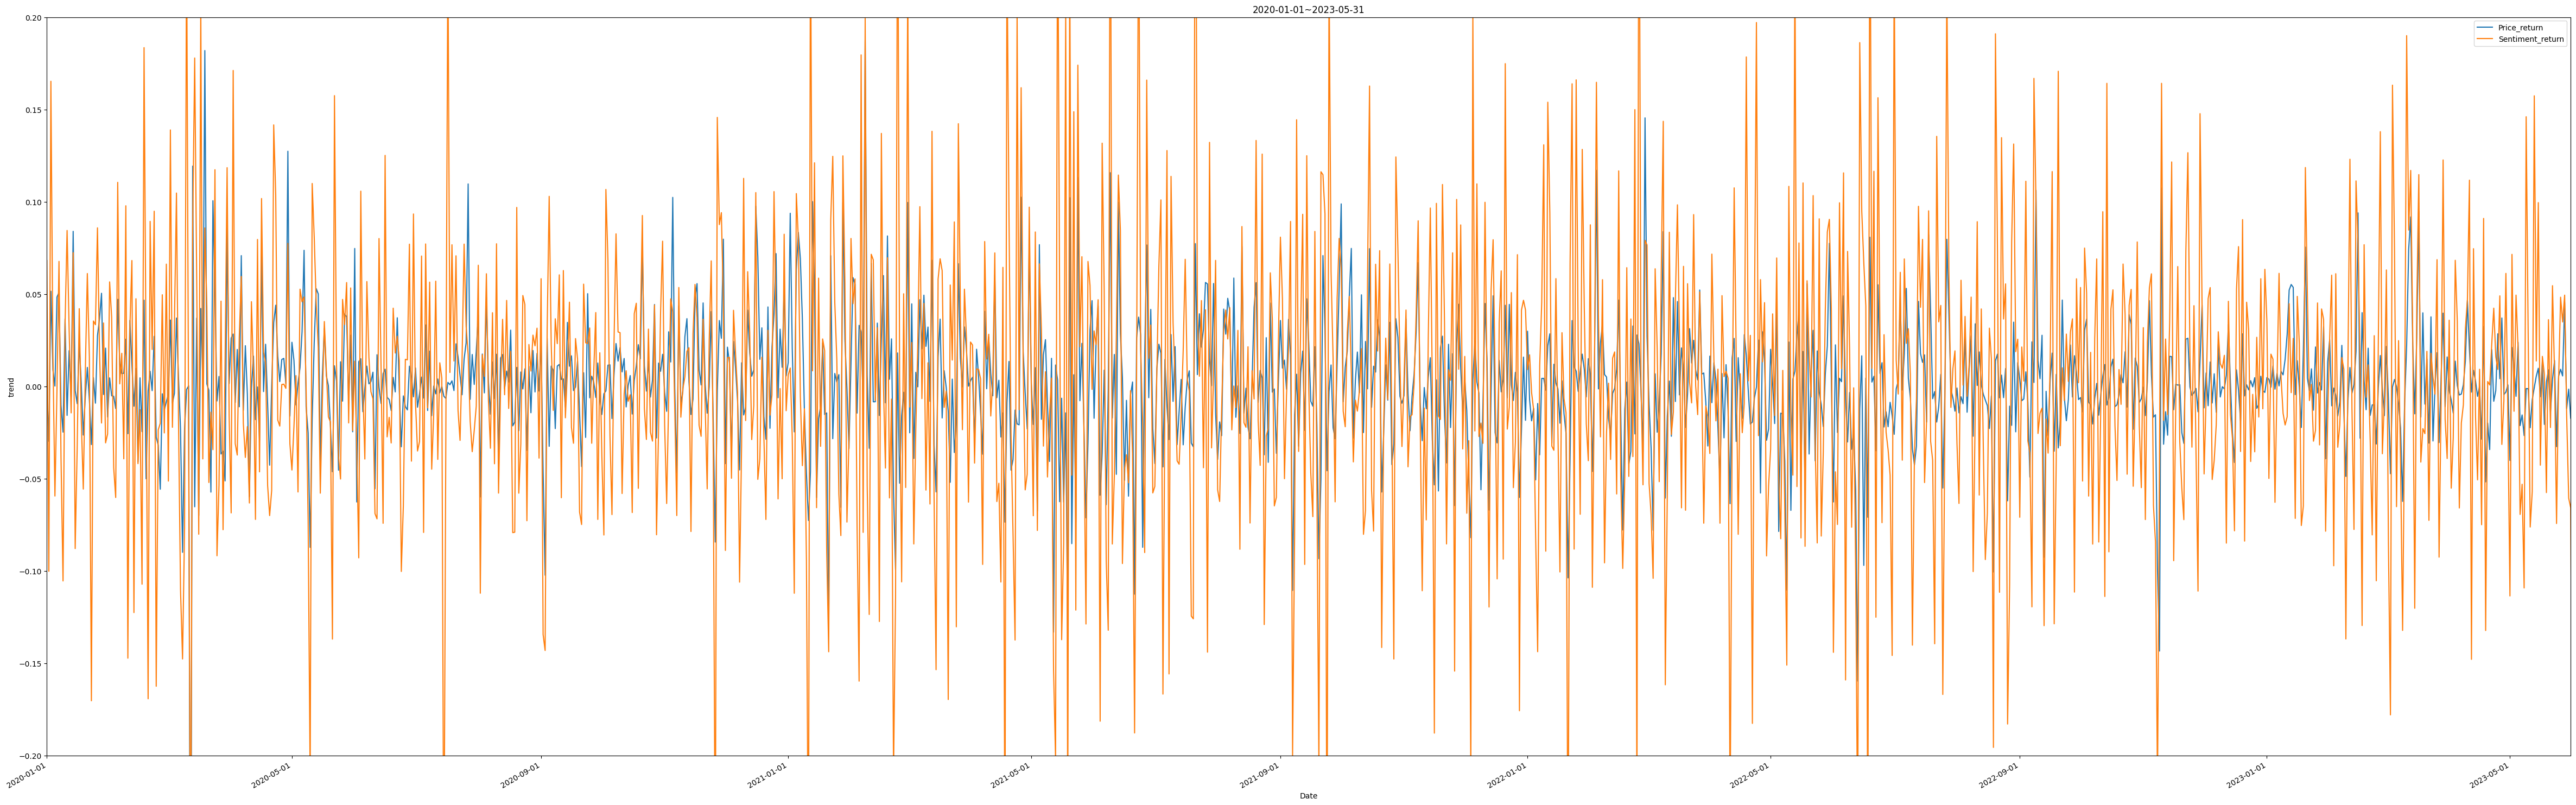

0.6936647955092221
1247
皮尔森相关系数为: 0.5634159802648661


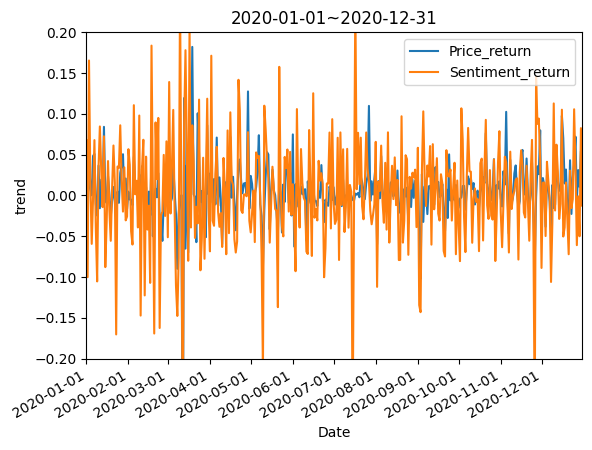

0.6693989071038251
366
皮尔森相关系数为: 0.5449663377430999


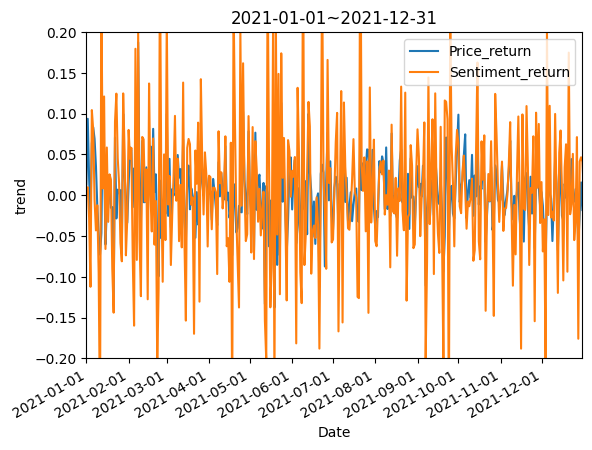

0.7506849315068493
365
皮尔森相关系数为: 0.6055699614532858


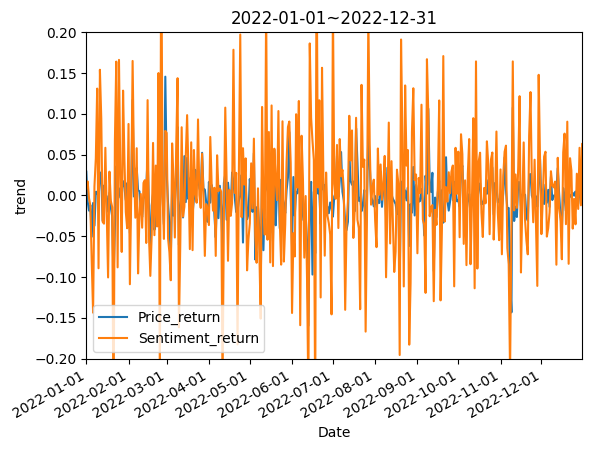

0.663013698630137
365
皮尔森相关系数为: 0.5450377555533802


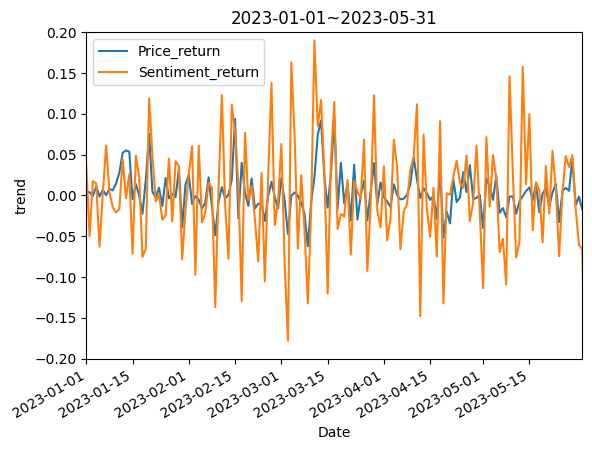

0.6887417218543046
151
皮尔森相关系数为: 0.5590163095809363


In [3]:
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np
sentiment = pd.read_csv(data_path,dtype={'id':str})
# sentiment = pd.read_csv('data/all_filter_update_2500.csv',lineterminator='\n')

print(sentiment.columns)
print(len(sentiment))
sentiment = sentiment[sentiment['scores'].notnull()]
sentiment = sentiment[sentiment['pred'].isin(['pos','negative','neut'])]
# filter
sentiment = sentiment[sentiment['label'] == 1]
print(len(sentiment))

print(len(sentiment))
thr = 400
sentiment = sentiment[(sentiment['user_follower_count'] > thr) | (sentiment['favorite_count'] > thr) | (sentiment['quote_count'] > thr) | (sentiment['reply_count'] > thr) | (sentiment['retweet_count'] > thr)]
print(len(sentiment))

scaler = MinMaxScaler()
# for key in ['user_follower_count','favorite_count','quote_count','reply_count','retweet_count']:
#     sentiment[[key]]= scaler.fit_transform(sentiment[[key]])

sentiment['date'] = pd.to_datetime(sentiment['day'])
# 将日期列设置为索引
sentiment.set_index('date', inplace=True)
target = 'scores'
sentiment[target]  = sentiment[target].astype('str')
# sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]) if row[0][4:] else 0)
sentiment['pos'] = sentiment[target].str.split('\n').map(lambda row: float(row[0][4:]))
sentiment['neg'] = sentiment[target].str.split('\n').map(lambda row: float(row[1][4:]))
sentiment['neu'] = sentiment[target].str.split('\n').map(lambda row: float(row[2][4:]))
# sentiment['compound'] = sentiment[target].str.split('\n').map(lambda row: float(row[3][9:]))

# sentiment['metrics'] = sentiment['pos'] - sentiment['neg'] + sentiment['neu']
# sentiment['metrics'] = sentiment['pos'] - sentiment['neg']

def calculate_metrics(row):
    if row['neg'] > row['pos']:
        return -1 * row['neg']
    else:
        return row['pos']
sentiment['metrics'] = sentiment.apply(calculate_metrics, axis=1)

# for key in ['user_follower_count','favorite_count','quote_count','reply_count','retweet_count']:
#     sentiment['metrics'] = sentiment['metrics'] + sentiment['metrics']*sentiment[key]
# print(sentiment.groupby(sentiment.index)['date'])
# 按天求和
sentiment = sentiment.groupby(sentiment.index)['metrics'].mean().reset_index()

# print(sentiment.groupby(sentiment.index).size())
# sentiment = sentiment.groupby(sentiment.index)[['pos','neg','neu']].mean().reset_index()
# sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
# sentiment['metrics'] = sentiment['compound']
# sentiment = sentiment['metrics']
# print(sentiment)
# 过滤outlier
# sentiment = sentiment[sentiment['metrics']>10000]
# sentiment = sentiment[sentiment['metrics']<16000]

# 平移
# sentiment.set_index('date', inplace=True)
# sentiment.index = sentiment.index.shift(1, freq='D')
# sentiment = sentiment.reset_index()

# 归一化
scaler = MinMaxScaler()
sentiment[['metrics']]= scaler.fit_transform(sentiment[['metrics']])
print(sentiment['metrics'])
# 滑动窗口平滑
# window_size = 7 # 窗口大小
# sentiment['metrics'] = sentiment['metrics'].rolling(window_size).mean()


# 差分计算
# print(sentiment['metrics'][0:10])
sentiment['metrics_return'] = sentiment['metrics'].pct_change()
sentiment = sentiment[sentiment['metrics_return'] < 9999]
df['value_return'] = df['value'].pct_change()
df = df[df['value_return'] < 9999]

# print(df[df['value_return'] > 1])
# df['value']
# price_return[0:10]


# 绘制价格走势图
trend = sentiment['metrics_return'].tolist()
sen_dates = sentiment['date'].tolist()
dates = list(df['timestamp'])
prices = list(df['value_return'])
print(trend)
print(prices)
def show_trend(start, end, flag):
    if flag == 1:
        plt.figure(figsize=(60, 20))
    plt.plot(dates, prices,label='Price_return')

    plt.plot(sen_dates, trend,label='Sentiment_return')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('trend')
    plt.title(start+'~'+end)
    plt.ylim(-0.2,0.2)
    plt.xlim(pd.Timestamp(start), pd.Timestamp(end))
    plt.legend()
    plt.show()

    global sentiment
    sentiment = sentiment[sentiment['metrics_return'].notnull()]
    join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
    join = join[(join['date']>= pd.Timestamp(start)) & (join['date'] <= pd.Timestamp(end))]
    # print(join)
    
    t1 = join['metrics_return'].to_list()
    t2 = join['value_return'].to_list()
    good = 0
    for i in range(len(t1)):
        if t1[i] * t2[i] > 0:
            good = good + 1
    print(good/len(t1))
    date = join['date'].to_list()
    corr = np.corrcoef(t1, t2)[0, 1]
    print(len(date))
    print("皮尔森相关系数为:", corr)
    
show_trend('2020-01-01', '2023-05-31', 1)
# show_trend('2020-01-01', '2020-01-31', 0)
# show_trend('2021-01-01', '2021-01-31', 0)
show_trend('2020-01-01', '2020-12-31', 0)
show_trend('2021-01-01', '2021-12-31', 0)
show_trend('2022-01-01', '2022-12-31', 0)
show_trend('2023-01-01', '2023-05-31', 0)

2020-1-1 -0.11740321509779662 0.2996066070255682
2020-2-1 -0.3945495070094991 -0.07990798974176014
2020-3-1 -0.04721049328401131 -0.2512994039744804
2020-4-1 -0.022599274014504313 0.3450558002580348
2020-5-1 0.271491237978222 0.09089082907512055
2020-6-1 -0.21562886147692625 -0.034406792006134564
2020-7-1 0.03765172129893776 0.2380805742843048
2020-8-1 -0.44828070434647016 0.03164034226298207
2020-9-1 0.21756508161317928 -0.07661623025644738
2020-10-1 0.1227494011723679 0.2765789475431324
2020-11-1 0.28365845666090383 0.4241232778458722
2020-12-1 -0.04873302471918347 0.4771346203900796
2021-1-1 0.3127175983158687 0.14211037528971773
2021-2-1 -0.14580794239494818 0.36307850157761895
2021-3-1 -0.24942465320376822 0.30468288920179887
2021-4-1 -0.05218744700207332 -0.019963606718107846
2021-5-1 -0.49598350307682976 -0.3531478338287074
2021-6-1 -0.02444069298167373 -0.06041104568990201
2021-7-1 -0.1338036261001844 0.18809835246708398
2021-8-1 -0.2473364028586638 0.1376200586848887
2021-9-1 

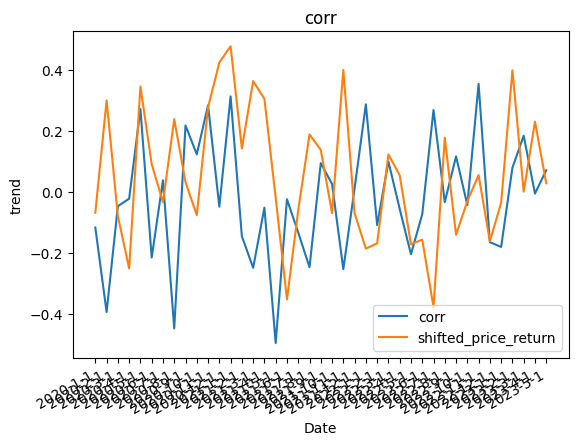

0.12388197601707847
-0.07492101367400915


In [3]:
# def show_trend(start, end, flag, his,thr):
#     global sentiment
#     sentiment = sentiment[sentiment['metrics_return'].notnull()]
#     join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
#     join = join[(join['date']>= pd.Timestamp(start)) & (join['date'] <= pd.Timestamp(end))]
#     # print(join)
    
#     t1 = join['metrics_return'].to_list()
#     t2 = join['value_return'].to_list()
    
#     date = join['date'].to_list()
#     corr = np.corrcoef(t1, t2)[0, 1]
#     # print(len(date))
#     history_len = his
#     good = 0
#     all = 0
#     thr = 0.02
#     for i in range(len(t1)):
#         if i < history_len + 1:
#             continue
#         h_p = t2[i-history_len:i]
#         h_s = t1[i-history_len:i]
#         # print(i-history_len-1,i)
#         h_corr = np.corrcoef(h_s, h_p)[0, 1]
#         if abs(h_corr) < thr:
#             continue
#         # print(h_corr)
#         all = all + 1
#         # print(i)
#         # if t1[i] * t2[i] > 0:
#         #     good = good + 1
#         if h_corr > 0:
#             # if t2[i]>=0.02 and t1[i] >= 0.02:
#             #     good = good + 1
#             # elif t2[i]<=-0.02 and t1[i]<=-0.02:
#             #     good = good + 1
#             # else:
#             #     if -0.02<=t2[i]<=0.02 and -0.02<=t1[i]<=0.02:
#             #         good = good + 1
#             if t1[i] * t2[i] >= 0:
#                 good = good + 1
#         if h_corr < 0:
#             if t1[i] * t2[i] <= 0:
#                 good = good + 1
#     if all == 0:
#         good = 0
#         all = 1
#     return corr, good/all,all


def show_trend(start, end, lag, window_size):
    global sentiment
    sentiment = sentiment[sentiment['metrics_return'].notnull()]
    join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
    
    join = join[(join['date']>= pd.Timestamp(start)) & (join['date'] <= pd.Timestamp(end))]

    
    # join['metrics_return'] = join['metrics_return'].shift(lag)

    # window_size = 7 # 窗口大小
    # join['metrics_return'] = join['metrics_return'].rolling(window_size).mean()

    
    join = join[join['metrics_return'].notna()]
    # print(join)
    
    t1 = join['metrics_return'].to_list()
    t2 = join['value_return'].to_list()
    Close = join['Close'].to_list()
    Open = join['Open'].to_list()
    date = join['date'].to_list()
    corr = np.corrcoef(t1, t2)[0, 1]
    # corr_2 = np.corrcoef(t1[:-1], t2[:-1])[0, 1]

    # if corr_2>0:
    #     if t1[-1] * t2[-1] > 0:
    #         print('hit')

    # if corr_2<0:
    #     if t1[-1] * t2[-1] < 0:
    #         print('hit')

    # print(len(date))
    # good = 0
    # all = 0
    # for i in range(len(t1)):
    #     if corr > 0:
    #         if t1[i] * t2[i] >= 0:
    #             good = good + 1
    #     if corr < 0:
    #         if t1[i] * t2[i] <= 0:
    #             good = good + 1
    # if all == 0:
    #     good = 0
    #     all = 1
    # return corr, sum(t2)

    # good = 0
    # for i in range(len(t1)):
    #     if t1[i] * t2[i] > 0:
    #         good = good + 1

    return corr, (Close[-1]-Open[0])/Open[0]



# for i in range(30):
#     for j in range(9):
#         corr, acc,all = show_trend('2020-01-01', '2023-05-31',0, i+2,(j+1)/10)
#         print(i+2,(j+1)/10,acc, corr,all)
# corr_l = []
# acc_l = []
# for size in range(1):
#     for lag in range(1):
#         corr, test = show_trend('2020-01-01', '2023-05-31', 0, lag,size+1)
#         corr_l.append(corr)
#         acc_l.append(test)
#         print(size+1,lag+1,corr,test)
# print(max(corr_l))
# print(max(acc_l))




for lag in range(1):
    corr_l = []
    abs_corr_l = []
    acc_l = []
    date = []
    import calendar
    for year in [2020,2021,2022,2023]:
        for month in range(12):
            if month == 5 and year == 2023:
                break
            days_in_month = calendar.monthrange(year, month + 1)[1]
            period_num = 1
            period_len = days_in_month//period_num
            for i in range(period_num):

                corr, test = show_trend(f'{year}-{month+1}-{i*period_len+1}', f'{year}-{month+1}-{(i+1)*period_len}', lag, 1)
                print(f'{year}-{month+1}-{i*period_len+1}',corr, test)
                corr_l.append(corr)
                abs_corr_l.append(abs(corr))
                acc_l.append(test)
                date.append(f'{year}-{month+1}-{i*period_len+1}')
                

    # shifted_acc_l = acc_l[1:] + [acc_l[0]]

    shifted_acc_l = [acc_l[-1]] + acc_l[:-1]
    # corr_l = corr_l[:-1]


    # plt.figure(figsize=(60, 20))
    plt.plot(date, corr_l,label='corr')
    # plt.plot(date, acc_l,label='price_return')
    plt.plot(date, shifted_acc_l,label='shifted_price_return')
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('trend')
    plt.title('corr')
    # plt.ylim(-0.2,0.2)
    # plt.xlim(pd.Timestamp(start), pd.Timestamp(end))
    plt.legend()
    plt.show()
    print(np.corrcoef(corr_l, acc_l)[0, 1])
    print(np.corrcoef(corr_l, shifted_acc_l)[0, 1])
    # print(sum(acc_l)/len(acc_l), sum(corr_l)/len(corr_l) , sum(abs_corr_l)/len(abs_corr_l))

# 导出数据用于预测模型

In [1]:
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
data_path = '../bitcoin_scrapy/update/0730/all_filter_update_minimun.csv'
sentiment = pd.read_csv(data_path,dtype={'id':str})

print(sentiment.columns)
print(len(sentiment))
sentiment = sentiment[sentiment['scores'].notnull()]
sentiment = sentiment[sentiment['pred'].isin(['pos','negative','neut'])]
# filter
sentiment = sentiment[sentiment['label'] == 1]
print(len(sentiment))

print(len(sentiment))
thr = 400
sentiment = sentiment[(sentiment['user_follower_count'] > thr) | (sentiment['favorite_count'] > thr) | (sentiment['quote_count'] > thr) | (sentiment['reply_count'] > thr) | (sentiment['retweet_count'] > thr)]
print(len(sentiment))


sentiment['date'] = pd.to_datetime(sentiment['day'])
# 将日期列设置为索引
sentiment.set_index('date', inplace=True)
sentiment['scores']  = sentiment['scores'].astype('str')
# sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]) if row[0][4:] else 0)
sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]))
sentiment['neg'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[1][4:]))
sentiment['neu'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[2][4:]))
# sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
pd.set_option('display.max_rows', None)
print(sentiment.groupby(sentiment.index).size())
pd.reset_option('display.max_rows')

# 按天求和
sentiment = sentiment.groupby(sentiment.index)[['pos','neg','neu']].mean().reset_index()
print(sentiment)


Index(['id', 'pred', 'scores', 'label', 'user_follower_count',
       'favorite_count', 'quote_count', 'reply_count', 'retweet_count', 'day',
       'created_at'],
      dtype='object')
21623980
13795617
13795617
9286767
date
2008-10-30        1
2009-02-18        1
2009-04-22        1
2011-04-29        1
2011-05-05        1
2011-05-15        1
2011-05-16        1
2011-05-20        1
2011-06-01        1
2011-06-06        1
2011-06-18        1
2011-06-20        1
2011-07-15        1
2011-08-26        2
2011-09-07        1
2011-09-19        1
2011-09-29        1
2011-10-17        1
2011-10-25        1
2011-11-27        1
2011-11-28        1
2011-12-20        1
2011-12-29        1
2012-06-15        1
2012-07-26        1
2012-08-06        1
2012-11-07        1
2012-11-13        1
2012-11-28        1
2013-02-26        1
2013-03-04        1
2013-03-05        1
2013-03-15        1
2013-03-20        1
2013-03-29        2
2013-04-01        1
2013-04-03        1
2013-04-09        1
2013-04-10    

In [2]:
df = pd.read_csv('data/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])
join = pd.merge(sentiment,df,left_on='date',right_on='Date')
join.to_csv('predict_model_data_0730.csv',index=False)

In [ ]:
sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
sentiment['metrics_diff'] = sentiment['metrics'].diff()


data_path = 'data/all_filter_update_2500.csv'
df = pd.read_csv('data/BTC-USD.csv')
df['timestamp'] = df['Date']
df['value'] = df['Open']
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['value_diff'] = df['value'].diff()

join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
# join = join[(join['date']>= pd.Timestamp('2020-01-01')) & (join['date'] <= pd.Timestamp('2023-05-31'))]
join = join.reset_index()
print(join)
count = 0
for i in range(len(join)):
    # print(join.at[0,'metrics_diff'])
    if join.at[i,'metrics_diff'] * join.at[i,'value_diff'] > 0:
        count = count + 1
print(count/len(join))


In [ ]:
data_path = 'data/all_filter_update_2500.csv'
df = pd.read_csv('data/BTC-USD.csv')
df['timestamp'] = df['Date']
df['value'] = df['Open']
df['timestamp'] = pd.to_datetime(df['timestamp'])


join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')


# 归一化
scaler = MinMaxScaler()
join['metrics'] = join['pos'] - join['neg']

join[['metrics']]= scaler.fit_transform(join[['metrics']])
join[['value']]= scaler.fit_transform(join[['value']])

join['metrics_return'] = join['metrics'].pct_change()
join['value_return'] = join['value'].pct_change()

join = join[join['metrics_return'] < 9999]
join = join[join['value_return'] < 9999]

join = join[(join['date']>= pd.Timestamp('2020-01-01')) & (join['date'] <= pd.Timestamp('2023-05-31'))]


print(join['metrics_return'].corr(join['value_return']))